# 1. Perceptron

### A perceptron is a fundamental unit of the neural network which takes weighted inputs, process it and capable of performing binary classifications. 

In the perceptron model inputs can be real numbers unlike the Boolean inputs in MP Neuron Model. 
The output from the model will still be binary {0, 1}. The perceptron model takes the input x if the weighted sum of the inputs is greater than threshold b output will be 1 else output will be 0.


In [24]:
# Load required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from KUtils.eda import chartil
from KUtils.common import utils as cutils

from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp
from KUtils.classifier import generic_classifier_utils as gcu

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [3]:
adult_income_df = pd.read_csv('cleaned.csv')

In [5]:
adult_income_df['target'] = adult_income_df['target'].map(
    {' >50K':1, ' <=50K':0})

In [7]:
adult_income_df['target'] = adult_income_df['target'].astype('category')


In [8]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,0


In [19]:
gcu.kesh_label_encoder(adult_income_df, 'target', verbose=True)

workclass
Replacing [ Without-pay] with 1
Replacing [ Private] with 2
Replacing [ State-gov] with 3
Replacing [ Self-emp-not-inc] with 4
Replacing [ Local-gov] with 5
Replacing [ Federal-gov] with 6
Replacing [ Self-emp-inc] with 7
education
Replacing [ Preschool] with 1
Replacing [ 1st-4th] with 2
Replacing [ 5th-6th] with 3
Replacing [ 9th] with 4
Replacing [ 11th] with 5
Replacing [ 7th-8th] with 6
Replacing [ 10th] with 7
Replacing [ 12th] with 8
Replacing [ HS-grad] with 9
Replacing [ Some-college] with 10
Replacing [ Assoc-acdm] with 11
Replacing [ Assoc-voc] with 12
Replacing [ Bachelors] with 13
Replacing [ Masters] with 14
Replacing [ Doctorate] with 15
Replacing [ Prof-school] with 16
marital_status
Replacing [ Never-married] with 1
Replacing [ Separated] with 2
Replacing [ Married-spouse-absent] with 3
Replacing [ Widowed] with 4
Replacing [ Divorced] with 5
Replacing [ Married-civ-spouse] with 6
Replacing [ Married-AF-spouse] with 7
occupation
Replacing [ Priv-house-serv] w

In [20]:
X = adult_income_df.drop('target', axis=1)
y = adult_income_df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

In [30]:
clf = Perceptron(tol=0.001, random_state=0)
clf.fit(X_train, y_train) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
# Making predictions
y_pred_default = clf.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6972
           1       0.55      0.40      0.46      2244

   micro avg       0.77      0.77      0.77      9216
   macro avg       0.69      0.65      0.66      9216
weighted avg       0.76      0.77      0.76      9216



In [32]:
# Accuracy, precision, recall and f1 score
local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print("Accuracy {0:.3f}, \nSensitivity {1:.3f}, \nSpecificity {2:.3f}, \nPrecision {3:.3f}, \nRecall {4:.3f}, \nf1_score {5:.3f}, \nroc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

Accuracy 0.774, 
Sensitivity 0.396, 
Specificity 0.895, 
Precision 0.548, 
Recall 0.396, 
f1_score 0.460, 
roc_auc 0.646


# Hyper paremeter tuning 
Refer https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished


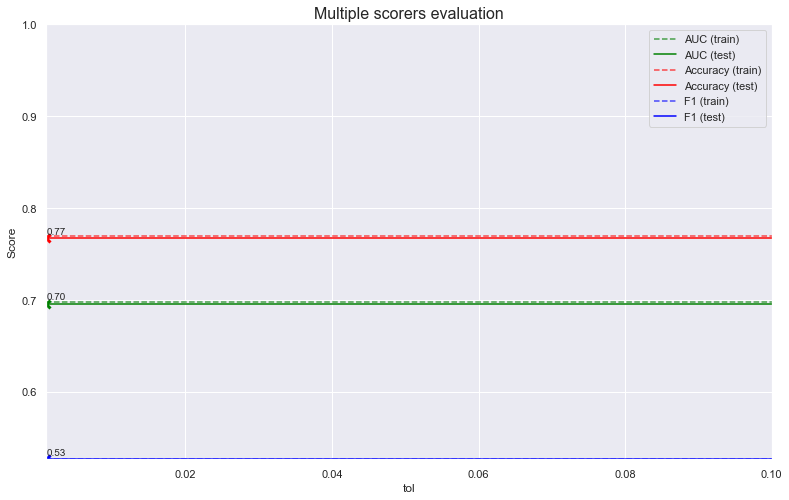

Best score:  0.695446310736408
Best Estimator:  Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)
Best Params:  {'tol': 0.001}


In [36]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='tol',
                                                hyper_parameter_range =  [0.001, 0.01, 0.1],
                                                classifier_algo= Perceptron(random_state=42))

# Not complete. To detailed study